In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data#
df = pd.read_csv("/Users/bhagyashrikadam/Documents/NEU_ASSIGNMENTS/ALY6020/Module1/Module1 Project/adult-all.csv")

In [3]:
df.shape

(48842, 15)

In [4]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
## PART1 ##

## Data Cleaning ##

# Checking the number of missing values ##
missing_values = df.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [6]:
# Descriptive Statistics #

df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


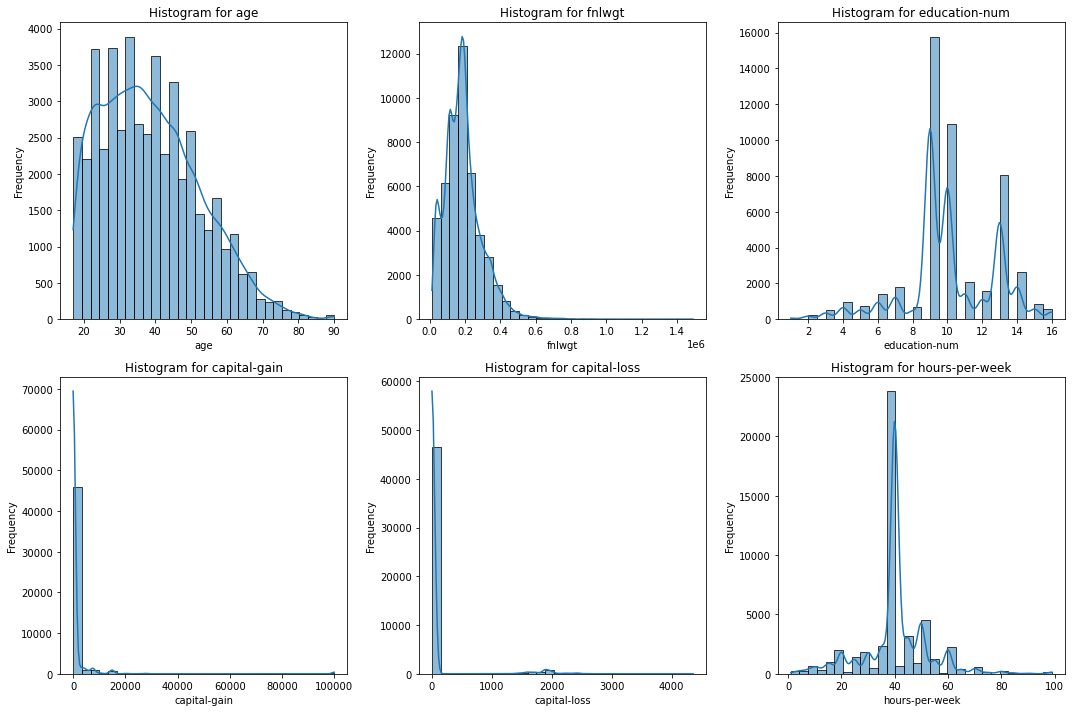

In [7]:
### EDA ###

# Extracting numerical features from the dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculating the number of rows required for the subplots
num_rows = -(-len(numerical_features) // 3)  # Ceiling division

# Setting up the figure and axis
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axs = axs.ravel()  # Flattening the axis array

# Plotting histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Histogram for {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Removing empty subplots
for i in range(len(numerical_features), num_rows * 3):
    fig.delaxes(axs[i])

# Displaying the plots
plt.tight_layout()
plt.show()

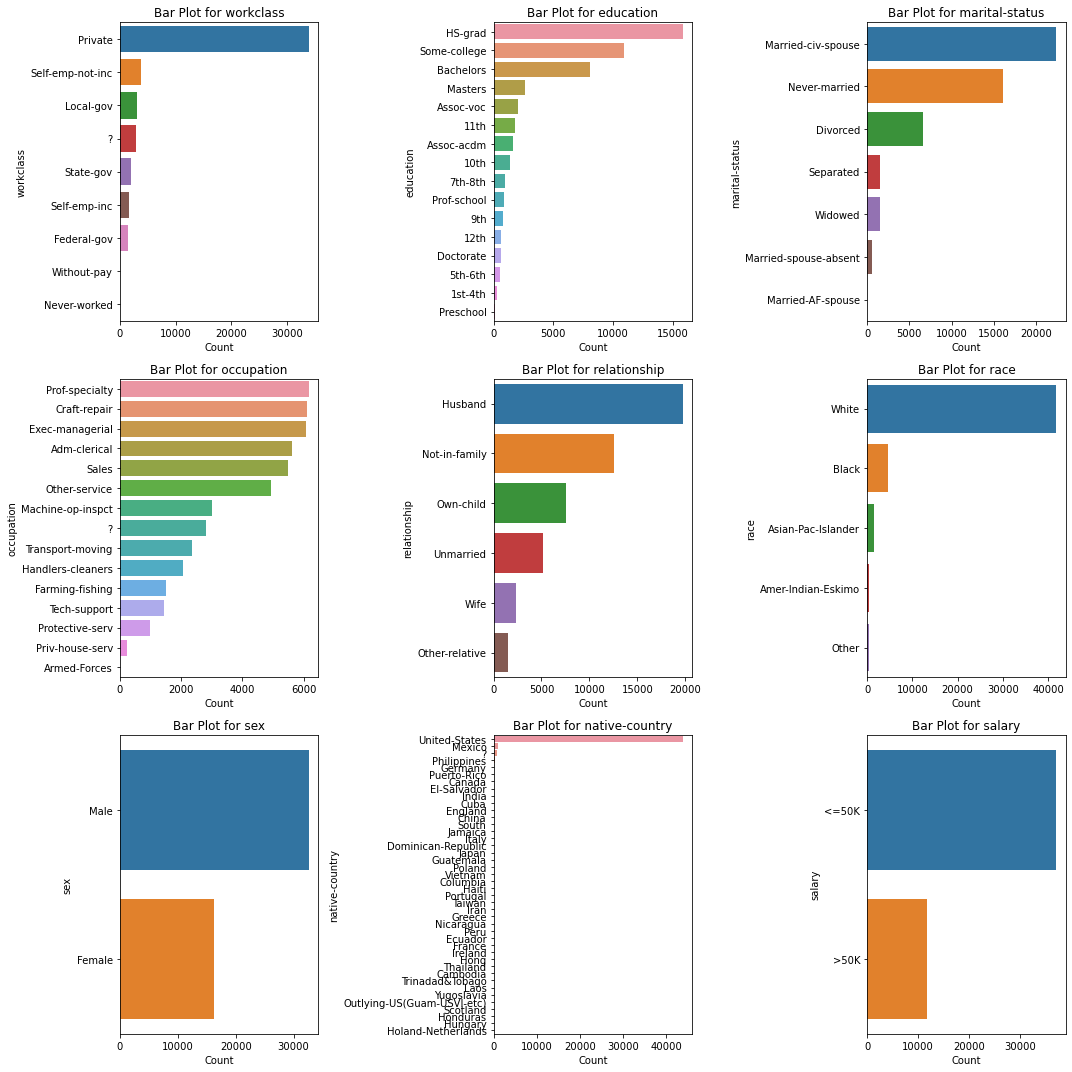

In [8]:
# Extracting categorical features from the dataset
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Calculating the number of rows required for the subplots
num_rows = -(-len(categorical_features) // 3)  # Ceiling division

# Setting up the figure and axis
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axs = axs.ravel()  # Flattening the axis array

# Plotting bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(y=df[feature], order=df[feature].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Bar Plot for {feature}')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(feature)

# Removing empty subplots
for i in range(len(categorical_features), num_rows * 3):
    fig.delaxes(axs[i])

# Displaying the plots
plt.tight_layout()
plt.show()

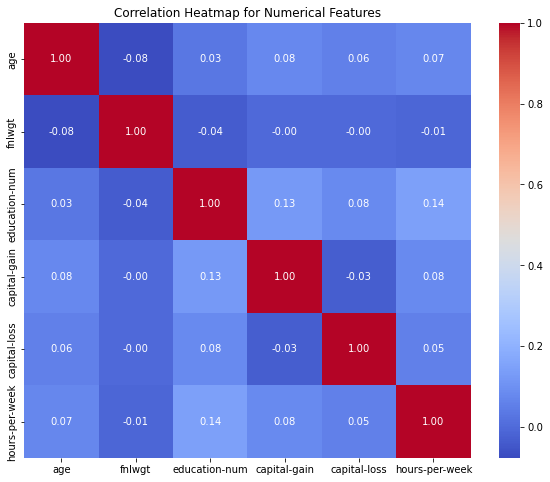

In [9]:
# 3. Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

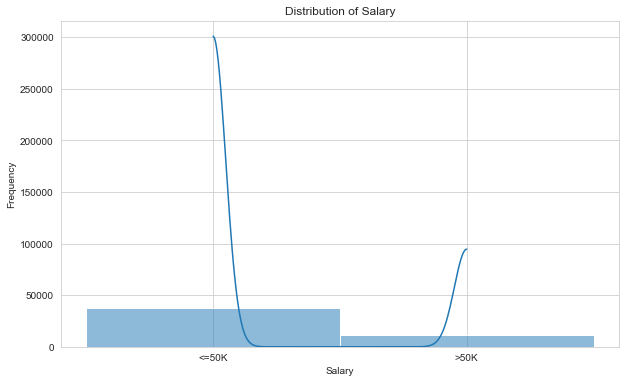

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10,6))

# Plot the distribution of the 'Salary' variable
sns.histplot(df['salary'], kde=True, bins=30)

# Set the title and labels of the plot
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [11]:
## PART 2 : MODEL BUILDING & ANALYSIS 

#Encode Categorical Variables
# Identify categorical variables in the dataset
categorical_features = df.select_dtypes(include=['object']).columns

#We will use One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded dataframe
data_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale
numerical_features_to_scale = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the Standard Scaler
scaler = StandardScaler()

# Scale the numerical featuresx
data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

# Display the first few rows of the scaled dataframe
data_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Build a Nearest Neighbors Model #

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1. Split the Data
# Define the feature set X and the target variable y
X = data_encoded.drop('salary_>50K', axis=1) 
y = data_encoded['salary_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 2. Select K
# Use GridSearchCV to find the optimal value of K
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Display the optimal value of K
best_k = knn_cv.best_params_['n_neighbors']
best_k

22

In [19]:
# 3. Train the Model

from sklearn.metrics import classification_report

# Initialize the K-Nearest Neighbors model with the optimal value of K
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the training data
knn_optimal.fit(X_train, y_train)

# 4. Evaluate the Model

# Predict the target variable on the testing data
y_pred = knn_optimal.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
accuracy

0.8430750332685024

In [20]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the report in tabular format
report_df

,precision,recall,f1-score,support
0,0.873587,0.927435,0.899706,7414.000000
1,0.716544,0.577495,0.639549,2355.000000
accuracy,0.843075,0.843075,0.843075,0.843075
macro avg,0.795065,0.752465,0.769627,9769.000000
weighted avg,0.835728,0.843075,0.836990,9769.000000


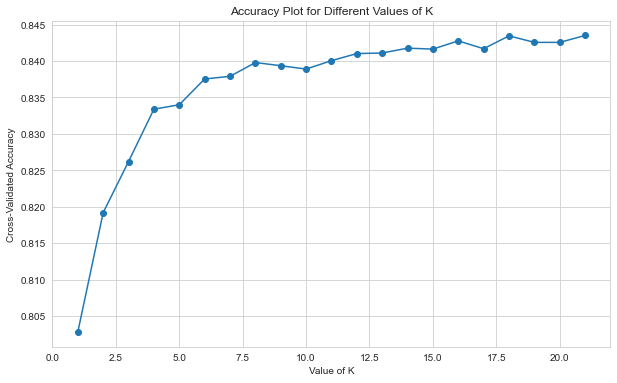

In [21]:
## Accuracy Plot for Different values of K ##

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# 1. Accuracy Plot for different values of K during cross-validation
k_values = range(1, 22)  # Considering K values from 1 to 20
cross_val_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_accuracies, marker='o')
plt.title('Accuracy Plot for Different Values of K')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

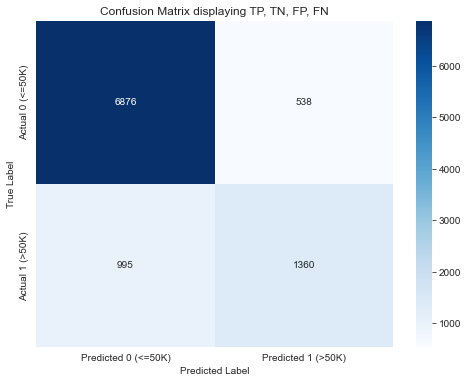

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0 (<=50K)', 'Predicted 1 (>50K)'], 
            yticklabels=['Actual 0 (<=50K)', 'Actual 1 (>50K)'])
plt.title('Confusion Matrix displaying TP, TN, FP, FN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
